# New York, JFK Airport
NOAA GHCN Data: https://www.ncei.noaa.gov/cdo-web/datasets

In [1]:
import pandas as pd
import numpy as np

In [2]:
weather=pd.read_csv("JFK_40.csv")
weather['DATE']= pd.to_datetime(weather['DATE'])
weather.set_index(["DATE"],inplace=True)
weather = weather.loc['1993-01-01':'2022-12-31']

In [3]:
# The documention details the core weather variables. (These variables have the lowest null values.)
df = weather[["AWND","PRCP", "SNOW", "SNWD", "TMAX", "TMIN"]].copy()
df.apply(pd.isnull).sum()

AWND    2
PRCP    0
SNOW    0
SNWD    0
TMAX    0
TMIN    0
dtype: int64

# AWND

In [4]:
w = df.AWND.isna().groupby(df.AWND.notna().cumsum()).sum()
w = w[w!=0]

b = pd.cut(w, bins=[0, 1, 5, np.inf], labels=['0-1','2-5','6 and above'])
out = b.groupby(b).size().reset_index(name='Number')
print (out)

          AWND  Number
0          0-1       2
1          2-5       0
2  6 and above       0


In [5]:
w = df.AWND.isna().groupby(df.AWND.notna().cumsum()).cumsum() #cumsum for index location
w = w[w!=0]
w

DATE
1997-01-21    1
1999-02-11    1
Name: AWND, dtype: int64

In [6]:
filtered_df = df.loc['1997-01-20':'1997-01-22']
filtered_df

,AWND,PRCP,SNOW,SNWD,TMAX,TMIN
DATE,,,,,,
1997-01-20,12.75,0.00,0.0,0.0,34,18
1997-01-21,NaN,0.00,0.0,0.0,38,27
1997-01-22,15.66,0.13,0.0,0.0,47,30


In [7]:
df.loc[df['AWND'].isnull(),'AWND']=df['AWND'].interpolate()

In [8]:
filtered_df = df.loc['1997-01-20':'1997-01-22']
filtered_df

,AWND,PRCP,SNOW,SNWD,TMAX,TMIN
DATE,,,,,,
1997-01-20,12.750,0.00,0.0,0.0,34,18
1997-01-21,14.205,0.00,0.0,0.0,38,27
1997-01-22,15.660,0.13,0.0,0.0,47,30


In [9]:
df.apply(pd.isnull).sum()

AWND    0
PRCP    0
SNOW    0
SNWD    0
TMAX    0
TMIN    0
dtype: int64

# Data Exploration

In [10]:
import seaborn as sns

In [11]:
JFK = pd.read_csv("JFK_30_Corrected.csv",index_col="DATE")
JFK

,AWND,PRCP,SNOW,SNWD,TMAX,TMIN
DATE,,,,,,
1993-01-01,18.12,0.00,0.0,0.0,56,26
1993-01-02,11.63,0.00,0.0,0.0,38,26
1993-01-03,6.49,0.11,0.0,0.0,43,24
1993-01-04,11.18,0.01,0.0,0.0,55,40
1993-01-05,17.45,0.64,0.0,0.0,62,41
...,...,...,...,...,...,...
2022-12-27,10.74,0.00,0.0,0.0,35,28
2022-12-28,8.50,0.00,0.0,0.0,45,27
2022-12-29,7.16,0.00,0.0,0.0,46,32


<AxesSubplot:>

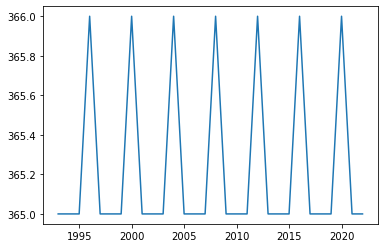

In [12]:
JFK.index = pd.to_datetime(JFK.index)
Yr=JFK.index.year.value_counts().sort_index()
Yr.plot()

In [13]:
JFK.describe()

,AWND,PRCP,SNOW,SNWD,TMAX,TMIN
count,10957.000000,10957.000000,10957.000000,10957.000000,10957.000000,10957.000000
mean,11.291997,0.118608,0.073077,0.262207,62.223966,47.721274
std,5.062135,0.335765,0.677387,1.473289,17.366164,16.429212
min,0.220000,0.000000,0.000000,0.000000,10.000000,0.000000
25%,8.280000,0.000000,0.000000,0.000000,48.000000,35.000000
50%,10.510000,0.000000,0.000000,0.000000,63.000000,48.000000
75%,13.420000,0.040000,0.000000,0.000000,78.000000,62.000000
max,308.030000,7.800000,30.300000,28.000000,103.000000,82.000000


array([<AxesSubplot:xlabel='DATE'>, <AxesSubplot:xlabel='DATE'>,
       <AxesSubplot:xlabel='DATE'>, <AxesSubplot:xlabel='DATE'>,
       <AxesSubplot:xlabel='DATE'>, <AxesSubplot:xlabel='DATE'>],
      dtype=object)

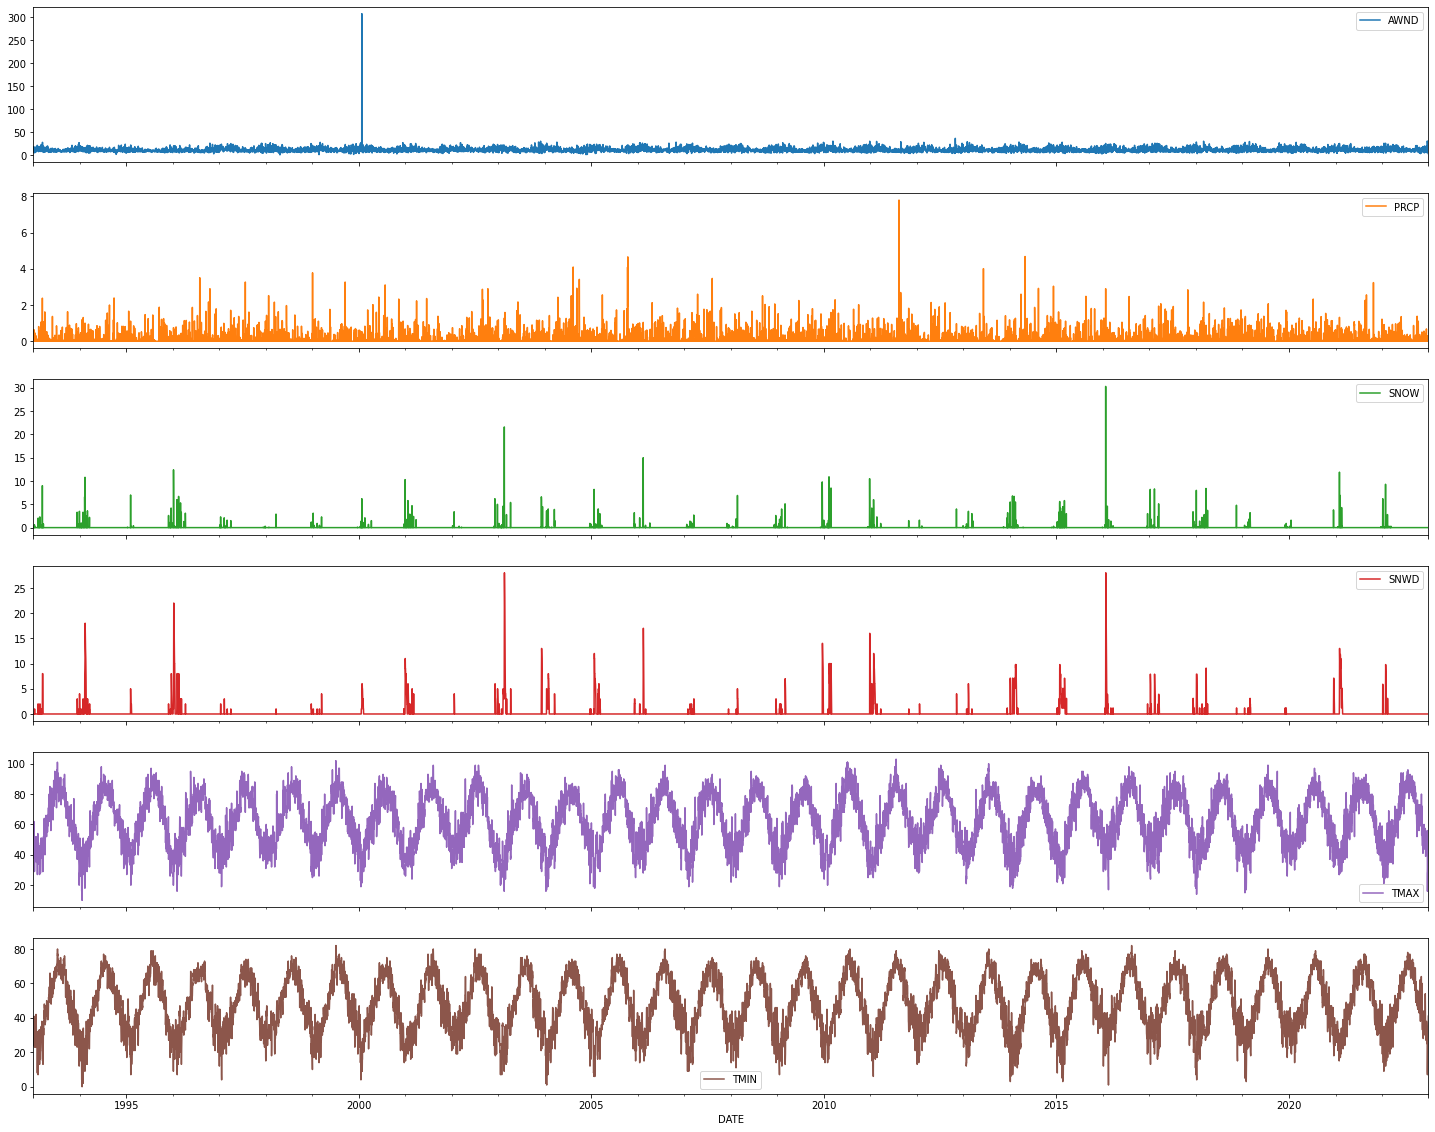

In [14]:
JFK.plot(subplots=True, figsize=(25,20))

array([[<AxesSubplot:title={'center':'AWND'}>,
        <AxesSubplot:title={'center':'PRCP'}>],
       [<AxesSubplot:title={'center':'SNOW'}>,
        <AxesSubplot:title={'center':'SNWD'}>],
       [<AxesSubplot:title={'center':'TMAX'}>,
        <AxesSubplot:title={'center':'TMIN'}>]], dtype=object)

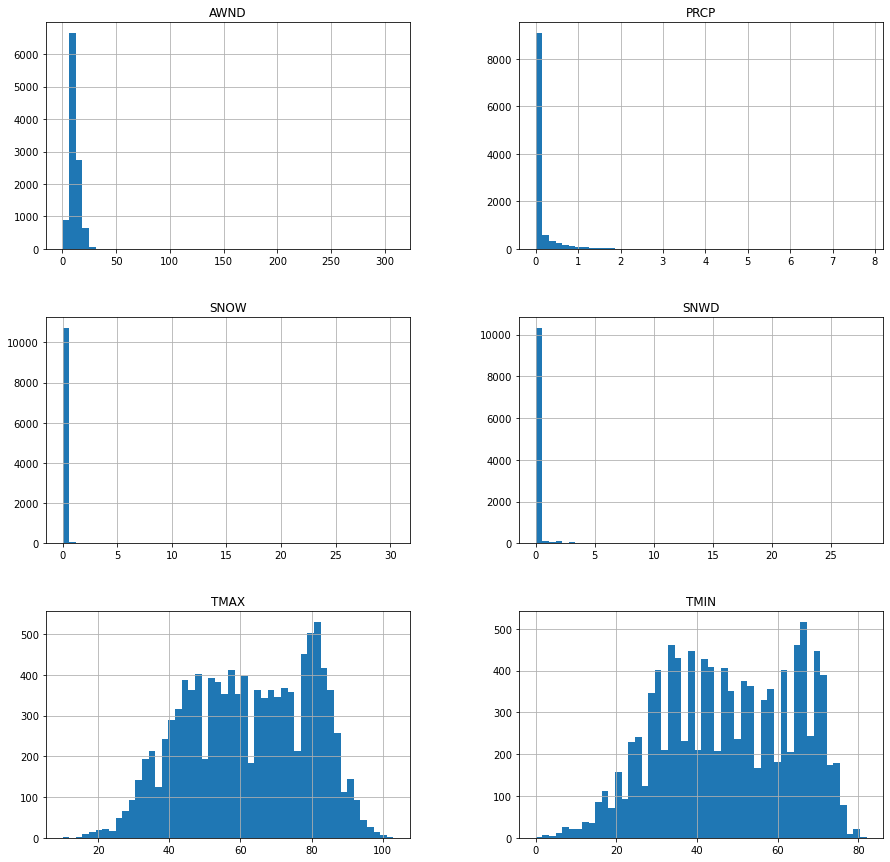

In [15]:
JFK.hist(bins=50,figsize=(15,15))

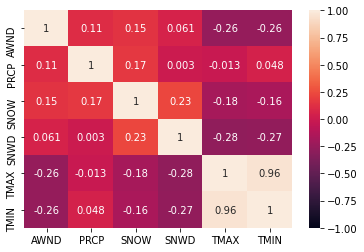

In [16]:
heatmap = sns.heatmap(JFK.corr(), vmin=-1, vmax=1, annot=True)